# Тема #3. Общие сведения про NumPy

## Предисловие

**NumPy** (сокращенно от Numerical Python) — библиотека с открытым исходным кодом для языка Python. Возможности:
- поддержка многомерных массивов (включая матрицы);
- поддержка высокоуровневых математических функций, предназначенных для работы с многомерными массивами;
- различные численные методы;
- инструменты для статистического моделирования.

Инсперированно с [источника](https://numpy.org/devdocs/user/quickstart.html).

Полезные ссылки:
- Официальные пользовательские [гайды](https://numpy.org/devdocs/user/index.html).
- Официальная [документация](https://numpy.org/doc/).
- Для более подробного изучения **NumPy** рекомендуется использовать подборку упражнений [100 NumPy exercises](https://www.kaggle.com/code/utsav15/100-numpy-exercises).

## База

Основной объект NumPy — однородный многомерный массив. Это таблица элементов (обычно чисел), все одного типа, индексированная кортежем неотрицательных целых чисел. В NumPy измерения называются осями.

Например, массив для координат точки в трехмерном пространстве $[1, 2, 1]$ имеет одну ось. Эта ось имеет 3 элемента, поэтому мы говорим, что она имеет длину $3$. В примере, изображенном ниже, массив имеет 2 оси. Первая ось имеет длину 2, вторая ось имеет длину 3.

In [1]:
[[1., 0., 0.],
 [0., 1., 2.]]

[[1.0, 0.0, 0.0], [0.0, 1.0, 2.0]]

Класс массива NumPy называется `ndarray`. Он также известен под псевдонимом `array`. Обратите внимание, что `numpy.array` — это не то же самое, что класс `array.array` из **стандартной библиотеки Python**, который обрабатывает только одномерные массивы и предлагает меньше функциональности. Более важными атрибутами объекта `ndarray` являются:

- **ndarray.ndim** — количество осей (измерений) массива.
- **ndarray.shape** — измерения массива. Это кортеж целых чисел, указывающий размер массива в каждом измерении. Для матрицы с n строками и m столбцами shape будет (n,m). Длина кортежа shape, таким образом, равна количеству осей, ndim.
- **ndarray.size** — общее количество элементов массива. Это равно произведению элементов shape.
- **ndarray.dtype** — объект, описывающий тип элементов в массиве. Можно создать или указать dtype, используя стандартные типы Python. Кроме того, NumPy предоставляет собственные типы. numpy.int32, numpy.int16 и numpy.float64 — вот некоторые примеры.
- **ndarray.itemsize** — размер в байтах каждого элемента массива. Например, массив элементов типа float64 имеет itemsize 8 (=64/8), а массив элементов типа complex32 имеет itemsize 4 (=32/8). Это эквивалентно ndarray.dtype.itemsize.
- **ndarray.data** — буфер, содержащий фактические элементы массива. Обычно нам не нужно использовать этот атрибут, поскольку мы будем получать доступ к элементам в массиве с помощью индексных средств.

### Пример 1

In [2]:
import numpy as np
a = np.arange(15).reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [3]:
a.shape

(3, 5)

In [4]:
a.ndim

2

In [5]:
a.dtype.name

'int64'

In [6]:
a.itemsize

8

In [7]:
a.size

15

In [8]:
type(a)

numpy.ndarray

In [9]:
b = np.array([6, 7, 8])
b

array([6, 7, 8])

In [10]:
type(b)

numpy.ndarray

### Пример 2

`numpy.array()` — это функция, которая создает объект `numpy.ndarray`. То есть `numpy.ndarray` — это сам класс, а `numpy.array()` — это удобный конструктор для его создания.

In [11]:
import numpy as np

a = np.array([1, 2, 3])
b = np.ndarray((3,), buffer=np.array([1, 2, 3]))

print(type(a))
print(type(b))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Создание массивов

Существует несколько способов создания массивов.

Например, вы можете создать массив из обычного списка или кортежа Python с помощью функции `array`. Тип результирующего массива выводится из типа элементов в последовательностях.

In [12]:
import numpy as np
a = np.array([2, 3, 4])
print(a)
print(a.dtype)

[2 3 4]
int64


In [13]:
import numpy as np
a = np.array([2.2, 3.1, 4.6])
print(a)
print(a.dtype)

[2.2 3.1 4.6]
float64


Функция `array()` преобразует последовательности последовательностей в двумерные массивы, последовательности последовательностей последовательностей в трехмерные массивы и т. д.

In [14]:
b = np.array([(1.5, 2, 3), (4, 5, 6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

Тип массива также можно явно указать во время создания:

In [15]:
c = np.array([[1, 2], [3, 4]], dtype=complex)
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Часто элементы массива изначально неизвестны, но известен его размер. Поэтому NumPy предлагает несколько функций для создания массивов с начальным содержимым-заполнителем. Они минимизируют необходимость в увеличении массивов, что является дорогостоящей операцией.

Функция `zeros` создает массив, полный нулей, функция `ones` создает массив, полный единиц, а функция `empty` создает массив, начальное содержимое которого является случайным и зависит от состояния памяти. По умолчанию `dtype` созданного массива — `float64`, но его можно указать с помощью ключевого слова-аргумента `dtype`.

In [16]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [17]:
np.ones((2, 3, 4), dtype=np.int16)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [18]:
np.empty((2, 3)) 

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

Для создания последовательностей чисел NumPy предоставляет функцию `arange`, которая аналогична встроенной в Python функции `range`, но возвращает массив.

In [19]:
np.arange(10, 30, 5)

array([10, 15, 20, 25])

In [20]:
np.arange(0, 2, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

Когда `arange` используется с аргументами с плавающей точкой, обычно невозможно предсказать количество полученных элементов из-за конечной точности с плавающей точкой. По этой причине обычно лучше использовать функцию `linspace`, которая получает в качестве аргумента количество элементов, которое нам нужно, вместо step:

In [21]:
from numpy import pi
np.linspace(0, 2, 9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [22]:
x = np.linspace(0, 2 * pi, 100)
f = np.sin(x)

### Печать массивов

При печати массива NumPy отображает его аналогично вложенным спискам, но со следующей компоновкой:

- последняя ось печатается слева направо,
- предпоследняя печатается сверху вниз,
- остальные также печатаются сверху вниз, причем каждый срез отделяется от следующего пустой строкой.

Одномерные массивы печатаются в виде строк, двумерные — в виде матриц, а трехмерные — в виде списков матриц.

In [23]:
a = np.arange(6)
print(a)

[0 1 2 3 4 5]


In [24]:
b = np.arange(12).reshape(4, 3)
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [25]:
c = np.arange(24).reshape(2, 3, 4)
print(c)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


Ниже будут приведены более подробные сведения о `reshape`.

Если массив слишком большой для печати, NumPy автоматически пропускает центральную часть массива и печатает только углы:

In [26]:
print(np.arange(100))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [27]:
print(np.arange(10000).reshape(100, 100))

[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


Чтобы отключить это поведение и заставить NumPy распечатать весь массив, можно изменить параметры печати с помощью `set_printoptions`.

In [28]:
import sys 
np.set_printoptions(threshold=sys.maxsize)

In [29]:
print(np.arange(100))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [30]:
np.set_printoptions(threshold=50)

### Основные операции

Арифметические операторы в массивах применяются поэлементно. Создается новый массив и заполняется результатом.

In [31]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)

In [32]:
c = a - b
c

array([20, 29, 38, 47])

In [33]:
b**2

array([0, 1, 4, 9])

In [34]:
10 * np.sin(a)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

In [35]:
a < 35

array([ True,  True, False, False])

В отличие от многих матричных языков, оператор произведения `*` работает поэлементно в массивах NumPy. Произведение матриц может быть выполнено с помощью оператора `@` (в python >=3.5) или функции или метода `dot`:

In [36]:
A = np.array([[1, 1],
              [0, 1]])
B = np.array([[2, 0],
              [3, 4]])

In [37]:
A * B

array([[2, 0],
       [0, 4]])

In [38]:
A @ B

array([[5, 4],
       [3, 4]])

In [39]:
A.dot(B)

array([[5, 4],
       [3, 4]])

Некоторые операции, такие как `+=` и `*=`, действуют на месте, изменяя существующий массив, а не создавая новый.

In [40]:
rg = np.random.default_rng(1)
a = np.ones((2, 3), dtype=int)
b = rg.random((2, 3))
a *= 3
a

array([[3, 3, 3],
       [3, 3, 3]])

In [41]:
b += a
b

array([[3.51182162, 3.9504637 , 3.14415961],
       [3.94864945, 3.31183145, 3.42332645]])

In [42]:
a += b

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

При работе с массивами разных типов тип результирующего массива соответствует более общему или точному (такое поведение называется приведением к базовому типу).

In [43]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0, pi, 3)
b.dtype.name

'float64'

In [44]:
c = a + b
c

array([1.        , 2.57079633, 4.14159265])

In [45]:
c.dtype.name

'float64'

In [46]:
d = np.exp(c * 1j)
d

array([ 0.54030231+0.84147098j, -0.84147098+0.54030231j,
       -0.54030231-0.84147098j])

In [47]:
d.dtype.name

'complex128'

Многие унарные операции, такие как вычисление суммы всех элементов массива, реализованы как методы класса `ndarray`.

In [48]:
a = rg.random((2, 3))
a

array([[0.82770259, 0.40919914, 0.54959369],
       [0.02755911, 0.75351311, 0.53814331]])

In [49]:
a.sum()

np.float64(3.1057109529998157)

In [50]:
a.max()

np.float64(0.8277025938204418)

По умолчанию эти операции применяются к массиву так, как если бы это был список чисел, независимо от его формы. Однако, указав параметр `axis`, можно применить операцию вдоль указанной оси массива:

In [51]:
b = np.arange(12).reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [52]:
b.sum(axis=0) # сумма каждого столбца

array([12, 15, 18, 21])

In [53]:
b.min(axis=1) # мин каждой строки

array([0, 4, 8])

In [54]:
b.cumsum(axis=1) # кумулятивная сумма по каждой строке

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]])

### Универсальные функции

NumPy предоставляет математические функции, такие как `sin`, `cos`, `exp`. В NumPy они называются «универсальными функциями» (`ufunc`). В NumPy эти функции работают поэлементно с массивом, создавая массив в качестве выходных данных.

In [55]:
B = np.arange(3)
np.exp(B)

array([1.        , 2.71828183, 7.3890561 ])

### Индексирование, нарезка и итерация

Одномерные массивы можно индексировать, разбивать на срезы и выполнять итерации, подобно спискам и другим последовательностям Python.

In [56]:
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [57]:
a[2]

np.int64(8)

In [58]:
a[2:5]

array([ 8, 27, 64])

In [59]:
a[::-1]

array([729, 512, 343, 216, 125,  64,  27,   8,   1,   0])

In [60]:
for i in a:
    print(i**(1 / 3.))

0.0
1.0
2.0
3.0
3.9999999999999996
4.999999999999999
5.999999999999999
6.999999999999999
7.999999999999999
8.999999999999998


Многомерные массивы могут иметь один индекс на ось. Эти индексы задаются в кортеже, разделенном запятыми:

In [61]:
def f(x, y):
    return 10 * x + y

b = np.fromfunction(f, (5, 4), dtype=int)

In [62]:
b[2, 3]

np.int64(23)

In [63]:
b[1:3, :]

array([[10, 11, 12, 13],
       [20, 21, 22, 23]])

In [64]:
b[0:5, 1]

array([ 1, 11, 21, 31, 41])

Если указано меньше индексов, чем число осей, отсутствующие индексы считаются полными срезами `:`

In [65]:
b[-1]

array([40, 41, 42, 43])

Выражение в скобках в `b[i]` рассматривается как `i`, за которым следует столько экземпляров `:`, сколько необходимо для представления оставшихся осей. NumPy также позволяет записать это с использованием точек как `b[i, ...]`.

Точки (`...`) представляют столько двоеточий, сколько необходимо для создания полного индексного кортежа. Например, если x — массив с 5 осями, то

- `x[1, 2, ...]` эквивалентно `x[1, 2, :, :, :]`,

- `x[..., 3]` — `x[:, :, :, :, 3]` и

- `x[4, ..., 5, :]` — `x[4, :, :, 5, :]`.

In [66]:
c = np.array([[[  0,  1,  2],
               [ 10, 12, 13]],
              [[100, 101, 102],
               [110, 112, 113]]])
c.shape

(2, 2, 3)

In [67]:
c[1, ...] # то же самое, что c[1, :, :] или c[1]

array([[100, 101, 102],
       [110, 112, 113]])

In [68]:
c[..., 2] # то же самое, что c[:, :, 2]

array([[  2,  13],
       [102, 113]])

Итерация по многомерным массивам выполняется относительно первой оси:

In [69]:
for row in b:
    print(row)

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


Однако, если требуется выполнить операцию над каждым элементом массива, можно использовать атрибут `flat`, который является итератором по всем элементам массива:

In [70]:
for element in b.flat:
    print(element)

0
1
2
3
10
11
12
13
20
21
22
23
30
31
32
33
40
41
42
43


## Манипуляция «формой»

### Изменение формы массива

Массив имеет форму, заданную числом элементов вдоль каждой оси:

In [71]:
a = np.floor(10 * rg.random((3, 4)))
a

array([[3., 7., 3., 4.],
       [1., 4., 2., 2.],
       [7., 2., 4., 9.]])

In [72]:
a.shape

(3, 4)

Форму массива можно изменить с помощью различных команд. Обратите внимание, что следующие три команды возвращают измененный массив, но не изменяют исходный массив:

In [73]:
a.ravel() # возвращает массив, собранных из элементов исходного массива

array([3., 7., 3., 4., 1., 4., 2., 2., 7., 2., 4., 9.])

In [74]:
a.reshape(6, 2) # возвращает массив с измененной формой

array([[3., 7.],
       [3., 4.],
       [1., 4.],
       [2., 2.],
       [7., 2.],
       [4., 9.]])

In [75]:
a.T # возвращает массив, транспонированный

array([[3., 1., 7.],
       [7., 4., 2.],
       [3., 2., 4.],
       [4., 2., 9.]])

In [76]:
a.T.shape

(4, 3)

In [77]:
a.shape

(3, 4)

Порядок элементов в массиве, полученном в результате `ravel`, обычно соответствует тому, как это устроено языке Си, то есть самый правый индекс «изменяется быстрее всего», поэтому элемент после `a[0, 0]` — это `a[0, 1]`. Если массив преобразуется в какую-то другую форму, массив снова обрабатывается как «C-style». NumPy обычно создает массивы, хранящиеся в этом порядке, поэтому `ravel` обычно не нужно копировать свой аргумент, но если массив был создан путем взятия срезов другого массива или создан с необычными параметрами, его может потребоваться скопировать. Функциям `ravel` и `reshape` также можно указать, используя необязательный аргумент, использовать массивы в стиле FORTRAN, в которых самый левый индекс изменяется быстрее всего.

Функция `reshape` возвращает свой аргумент с измененной формой, тогда как метод `ndarray.resize` изменяет сам массив:

In [78]:
a

array([[3., 7., 3., 4.],
       [1., 4., 2., 2.],
       [7., 2., 4., 9.]])

In [79]:
a.resize((2, 6))

In [80]:
a

array([[3., 7., 3., 4., 1., 4.],
       [2., 2., 7., 2., 4., 9.]])

Если в операции изменения формы размер задан как `-1`, остальные размеры рассчитываются автоматически:

In [81]:
a.reshape(3, -1)

array([[3., 7., 3., 4.],
       [1., 4., 2., 2.],
       [7., 2., 4., 9.]])

### Объединение разных массивов

Несколько массивов могут быть сложены вместе вдоль разных осей:

In [82]:
a = np.floor(10 * rg.random((2, 2)))
a

array([[9., 7.],
       [5., 2.]])

In [83]:
b = np.floor(10 * rg.random((2, 2)))
b

array([[1., 9.],
       [5., 1.]])

In [84]:
np.vstack((a, b))

array([[9., 7.],
       [5., 2.],
       [1., 9.],
       [5., 1.]])

In [85]:
np.hstack((a, b))

array([[9., 7., 1., 9.],
       [5., 2., 5., 1.]])

Функция `column_stack` складывает одномерные массивы как столбцы в двумерный массив. Она эквивалентна `hstack` только для двумерных массивов:

In [86]:
np.column_stack((a, b)) # получаем двумерный массив

array([[9., 7., 1., 9.],
       [5., 2., 5., 1.]])

In [87]:
a = np.array([4., 2.])
b = np.array([3., 8.])
np.column_stack((a, b)) # возвращает двумерный массив

array([[4., 3.],
       [2., 8.]])

In [88]:
np.hstack((a, b)) # результат другой

array([4., 2., 3., 8.])

Пояснение:

In [89]:
from numpy import newaxis
a[:, newaxis] # просмотр массива `a` как двумерного вектора-столбца

array([[4.],
       [2.]])

In [90]:
np.column_stack((a[:, newaxis], b[:, newaxis]))

array([[4., 3.],
       [2., 8.]])

In [91]:
np.hstack((a[:, newaxis], b[:, newaxis])) # результат тот же

array([[4., 3.],
       [2., 8.]])

В общем случае для массивов с более чем двумя измерениями `hstack` выполняет стекирование вдоль вторых осей, `vstack` выполняет стекирование вдоль первых осей, а `concatenate` допускает необязательные аргументы, задающие номер оси, вдоль которой должна выполняться конкатенация.

### Разделение одного массива на несколько меньших

Используя `hsplit`, можно разделить массив по горизонтальной оси, указав либо количество возвращаемых массивов одинаковой формы, либо столбцы, после которых должно выполняться разделение:

In [92]:
a = np.floor(10 * rg.random((2, 12)))
a

array([[6., 7., 6., 9., 0., 5., 4., 0., 6., 8., 5., 2.],
       [8., 5., 5., 7., 1., 8., 6., 7., 1., 8., 1., 0.]])

In [93]:
np.hsplit(a, 2)

[array([[6., 7., 6., 9., 0., 5.],
        [8., 5., 5., 7., 1., 8.]]),
 array([[4., 0., 6., 8., 5., 2.],
        [6., 7., 1., 8., 1., 0.]])]

In [94]:
np.hsplit(a, (3, 4))

[array([[6., 7., 6.],
        [8., 5., 5.]]),
 array([[9.],
        [7.]]),
 array([[0., 5., 4., 0., 6., 8., 5., 2.],
        [1., 8., 6., 7., 1., 8., 1., 0.]])]

`vsplit` разделяет по вертикальной оси, а `array_split` позволяет указать, по какой оси разделять.

## Копии и просмотры

При работе с массивами и манипулировании ими их данные иногда копируются в новый массив, а иногда нет. Это часто становится источником путаницы для новичков. Существует три случая:

### Распространенная ошибка

Простые присваивания не создают копий объектов или их данных.

In [95]:
a = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]])
b = a # новый объект не создается

In [96]:
b is a # a и b — это два имени одного и того же объекта ndarray

True

In [97]:
a[0] = 10
print(b)

[[10 10 10 10]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Python передает изменяемые объекты как ссылки, поэтому вызовы функций не создают копий.

In [98]:
def f(x):
    print(id(x))

In [99]:
id(a) # id — уникальный идентификатор объекта

135509846381968

In [100]:
f(a)

135509846381968


In [101]:
f(b)

135509846381968


### Просмотр или поверхностная копия

Различные объекты массива могут совместно использовать одни и те же данные. Метод `view` создает новый объект массива, который просматривает те же данные.

In [102]:
c = a.view()
c is a

False

In [103]:
c.base is a # c — это представление данных, принадлежащих a

True

In [104]:
c.flags.owndata

False

In [105]:
c = c.reshape((2, 6)) # форма a не меняется, переназначенное c по-прежнему является видом a
print(a)
print(c)

[[10 10 10 10]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[10 10 10 10  4  5]
 [ 6  7  8  9 10 11]]


Разрезание массива возвращает его представление:

In [106]:
s = a[:, 1:3]
s[:] = 10 # s[:] — это представление s. Обратите внимание на разницу между s = 10 и s[:] = 10

In [107]:
print(s)
print(a)

[[10 10]
 [10 10]
 [10 10]]
[[10 10 10 10]
 [ 4 10 10  7]
 [ 8 10 10 11]]


### Глубокая копия

Метод `copy` создает полную копию массива и его данных.

In [108]:
d = a.copy() # создается новый объект массива с новыми данными
d is a

False

In [109]:
d.base is a # d не имеет общего доступа к чему-либо из a

False

In [110]:
d[0, 0] = 9999
a

array([[10, 10, 10, 10],
       [ 4, 10, 10,  7],
       [ 8, 10, 10, 11]])

Иногда `copy` следует вызывать после среза, если исходный массив больше не требуется. Например, предположим, что `a` — это огромный промежуточный результат, а конечный результат `b` содержит лишь малую часть `a`, тогда при построении `b` со срезом следует сделать глубокую копию:

In [111]:
a = np.arange(int(1e8))
b = a[:100].copy()
del a  # память `a` может быть освобождена.

Если вместо этого используется `b = a[:100]`, `a` будет ссылаться на `b` и будет сохраняться в памяти, даже если будет выполнено `del a`.

## Расширенное индексирование и приемы индексирования

NumPy предлагает больше возможностей индексирования, чем обычные последовательности Python. В дополнение к индексированию по целым числам и срезам, как мы видели ранее, массивы могут индексироваться массивами целых чисел и массивами булевых значений.

#### Индексирование с помощью массивов индексов

In [112]:
a = np.arange(12)**2 # первые 12 квадратных чисел
i = np.array([1, 1, 3, 8, 5]) # массив индексов
a[i] # элементы `a` в позициях `i`

array([ 1,  1,  9, 64, 25])

In [113]:
j = np.array([[3, 4], [9, 7]]) # двумерный массив индексов
a[j] # та же форма, что и `j`

array([[ 9, 16],
       [81, 49]])

Когда индексированный массив `a` является многомерным, один массив индексов ссылается на первое измерение `a`. Следующий пример демонстрирует это поведение путем преобразования изображения меток в цветное изображение с использованием палитры.

In [114]:
palette = np.array([[0, 0, 0],        # черный
                    [255, 0, 0],      # красный
                    [0, 255, 0],      # зеленый
                    [0, 0, 255],      # синий
                    [255, 255, 255]]) # белый
image = np.array([[0, 1, 2, 0],       # каждое значение соответствует цвету в палитре
                  [0, 3, 4, 0]])
palette[image]                        # изображение цвета (2, 4, 3)

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

Мы также можем задать индексы для более чем одного измерения. Массивы индексов для каждого измерения должны иметь одинаковую форму.

In [115]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [116]:
i = np.array([[0, 1],  # индексы для первого размера `a`
              [1, 2]])

j = np.array([[2, 1],  # индексы для второго размера
              [3, 3]])
a[i, j]                # i и j должны иметь одинаковую форму

array([[ 2,  5],
       [ 7, 11]])

In [117]:
a[i, 2]

array([[ 2,  6],
       [ 6, 10]])

In [118]:
a[:, j]

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

### Индексирование с помощью булевых массивов

Когда мы индексируем массивы с помощью массивов (целочисленных) индексов, мы предоставляем список индексов для выбора. С булевыми индексами подход другой; мы явно выбираем, какие элементы в массиве нам нужны, а какие нет.

Самый естественный способ, который можно придумать для булевой индексации, — это использовать булевые массивы, которые имеют ту же форму, что и исходный массив:

In [119]:
a = np.arange(12).reshape(3, 4)
b = a > 4
b # `b` — это логическое значение с формой `a`

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

In [120]:
a[b] # 1d массив с выбранными элементами

array([ 5,  6,  7,  8,  9, 10, 11])

Это свойство может быть очень полезным в заданиях:

In [121]:
a[b] = 0 # Все элементы `a` выше 4 становятся 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

На следующем примере, можно увидеть, как использовать булеву индексацию для генерации изображения множества Мандельброта:

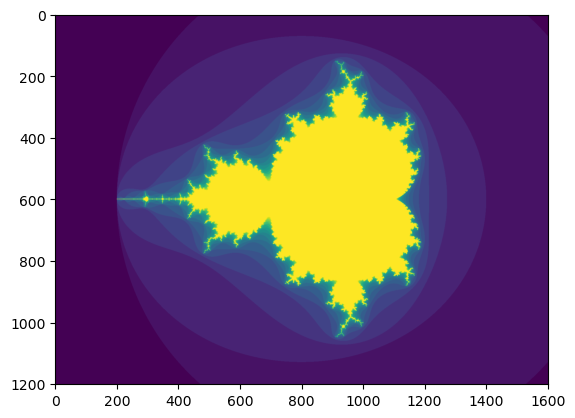

In [122]:
import numpy as np

import matplotlib.pyplot as plt
def mandelbrot(h, w, maxit=20, r=2):
    """Возвращает изображение фрактала Мандельброта размером (высота, ширина)."""

    x = np.linspace(-2.5, 1.5, 4*h+1)                   # координаты по горизонтали
    y = np.linspace(-1.5, 1.5, 3*w+1)                   # координаты по вертикали

    A, B = np.meshgrid(x, y)                            # создаем сетку координат
    C = A + B*1j                                        # создаем комплексную плоскость
    z = np.zeros_like(C)                                # инициализируем переменную z нулями

    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + C
        diverge = abs(z) > r                            # какие значения начинают расходиться
        div_now = diverge & (divtime == maxit)          # расходятся в текущую итерацию
        divtime[div_now] = i                            # записываем, на какой итерации
        z[diverge] = r                                  # ограничиваем значения, которые расходятся


    return divtime

plt.clf()
plt.imshow(mandelbrot(400, 400))

### The ix_() function

Функцию `ix_` можно использовать для объединения различных векторов, чтобы получить результат для каждого $n$-аплета. Например, если вы хотите вычислить все $a+b\cdot c$ для всех триплетов, взятых из каждого из векторов $a$, $b$ и $c$:

In [123]:
a = np.array([2, 3, 4, 5])
b = np.array([8, 5, 4])
c = np.array([5, 4, 6, 8, 3])
ax, bx, cx = np.ix_(a, b, c)
ax

array([[[2]],

       [[3]],

       [[4]],

       [[5]]])

In [124]:
bx

array([[[8],
        [5],
        [4]]])

In [125]:
cx

array([[[5, 4, 6, 8, 3]]])

In [126]:
result = ax + bx * cx
result

array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],

       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],

       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],

       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]], shape=(4, 3, 5))

In [127]:
result[3, 2, 4]

np.int64(17)

In [128]:
a[3] + b[2] * c[4]

np.int64(17)

Вы также можете реализовать сокращение следующим образом:

In [129]:
def ufunc_reduce(ufct, *vectors):
   vs = np.ix_(*vectors)
   r = ufct.identity
   for v in vs:
       r = ufct(r, v)
   return r

In [130]:
ufunc_reduce(np.add, a, b, c)

array([[[15, 14, 16, 18, 13],
        [12, 11, 13, 15, 10],
        [11, 10, 12, 14,  9]],

       [[16, 15, 17, 19, 14],
        [13, 12, 14, 16, 11],
        [12, 11, 13, 15, 10]],

       [[17, 16, 18, 20, 15],
        [14, 13, 15, 17, 12],
        [13, 12, 14, 16, 11]],

       [[18, 17, 19, 21, 16],
        [15, 14, 16, 18, 13],
        [14, 13, 15, 17, 12]]], shape=(4, 3, 5))

Преимущество этой версии reduce по сравнению с обычной ufunc.reduce заключается в том, что она использует правила трансляции, чтобы избежать создания массива аргументов размером с выходной файл, умноженный на количество векторов.

## Задания

### Задание 1

1. Задать массив $X$ несколькими способами.

$$X=\left[-15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15\right].$$

2. Найти количество элементов в $Х$, обозначить $n$.

3. Создать «дубликат» массива $X$, обозначим его как $\tilde X$. Не изменяя $X$ изменить в $\tilde X$ элемент равный $0$ на $1$.

4. Задать последовательность $Y$ для $i$ от $a$ до $b$ (с шагом $h$), где элементы определяются формулой:
$$Y_i=\frac{1}{i},\quad i\in\left\{a, a+h, a+2h, \ldots, b\right\},\quad i\neq 0.$$

5. Сгенерировать вложенную последовательность из $X=\left\{x_1,x_2,\ldots,x_n\right\}$ (пункт 1) и $Y=\left\{y_1,y_2,\ldots,y_n\right\}$ (пункт 4, взять $a=-15$, $b=15$):
$$Z=\left\{(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)\right\}.$$

### Задание 2

В одномерном массиве, состоящем из $n$ вещественных элементов, вычислить:
- сумму положительных элементов массива;
- произведение элементов массива, расположенных между максимальным по модулю и минимальным по модулю элементами;
- сумму элементов массива с нечетными номерами;
- сумму элементов массива, расположенных между первым и последним отрицательными элементами;
- упорядочить элементы массива по возрастанию;
- упорядочить элементы массива по убыванию;
- сжать массив, удалив из него все элементы, модуль которых не превышает 1.

Входные данные смоделировать самостоятельно.

### Задание 3

Для заданной матрицы размером 8 на 8 найти такие $k$, что $k$-я строка матрицы совпадает с $k$-м столбцом.

Найти сумму элементов в тех строках, которые содержат хотя бы один отрицательный элемент.

### Задание 4

Преобразовать вектор целых чисел в матричное двоичное представление.

Например вектору $(0, 1, 2, 3, 4, 5, 6, 7)$ будет соответствовать матрица
$$
\begin{pmatrix}
0 & 0 & 0 \\
0 & 0 & 1 \\
0 & 1 & 0 \\
0 & 1 & 1 \\
1 & 0 & 0 \\
1 & 0 & 1 \\
1 & 1 & 0 \\
1 & 1 & 1
\end{pmatrix}.
$$

### Задание 5

Рассмотрим два массива $A$ и $B$ формы $(8, 3)$ и $(2, 2)$. Необходимо найти строки $A$, которые содержат элементы каждой строки $B$ независимо от порядка элементов в $B$. Например, если
$$
A = \begin{pmatrix}
0 & 0 & 3 \\
1 & 1 & 2 \\
4 & 3 & 1 \\
3 & 1 & 1 \\
1 & 3 & 1 \\
2 & 0 & 3 \\
2 & 0 & 1 \\
0 & 0 & 3
\end{pmatrix},\quad
B = \begin{pmatrix}
0 & 3 \\
0 & 2 \\
\end{pmatrix},
$$
результат будет $\left(0, 5, 6, 7\right)$.
